# EDA

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBRegressor, XGBClassifier

In [113]:
data = pd.read_csv('melb_data.csv')

In [114]:
data.shape

(13580, 21)

In [115]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [116]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [117]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Las casas tienen en promedio 1.61 baños. La el 50% de las casas tienen 1 baño, el 75% de las casas tienen 2 baños y el 25% de las casas tienen 1 baño. El área promedio de las casas es de 151.97, sin embargo, la desviación estándar es de 541.01, lo cual indica una gran variabilidad.

## ¿Cómo es la distribución de años en los que se han vendido las casas?

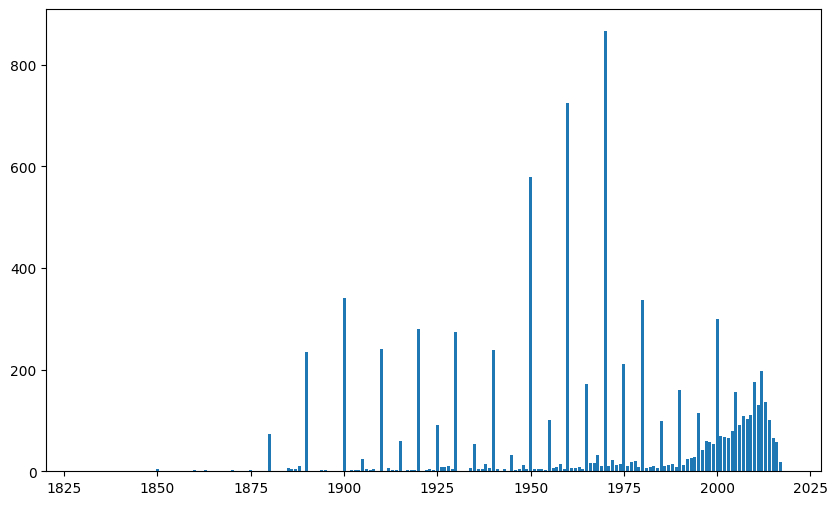

In [118]:
year_counts = data[data['YearBuilt'] > 1800]['YearBuilt'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.show()

### ¿Cómo es la distribución de los precios?

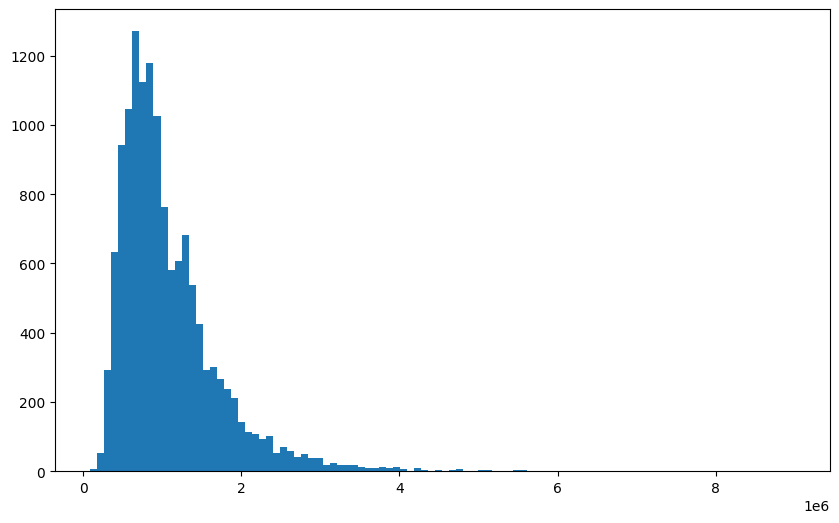

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=100)
plt.show()

### ¿Qué relaciones hay entre variables?

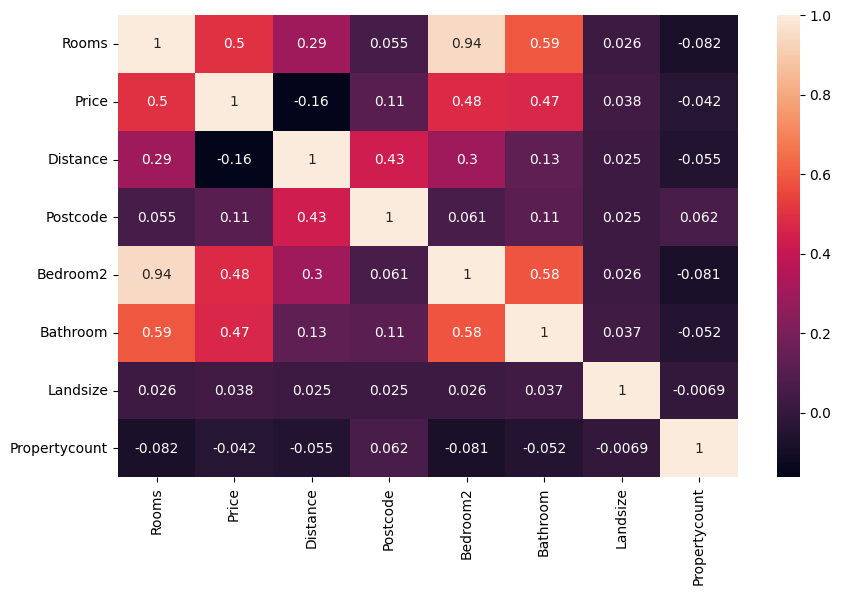

In [120]:
df_numerico = data.select_dtypes(include=['number'])
df_numerico = df_numerico.dropna(axis=1)
df_numerico = df_numerico.drop(columns=['Longtitude', 'Lattitude'], axis=1)
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

No existe una relación lineal clara entre las variables y el precio de la casa. Existen ciertas relaciones entre variables, lo que podría servir para no usar las que estén demasiado correlacionadas en la predicción. Rooms y Bedroom2 tienen correlación.

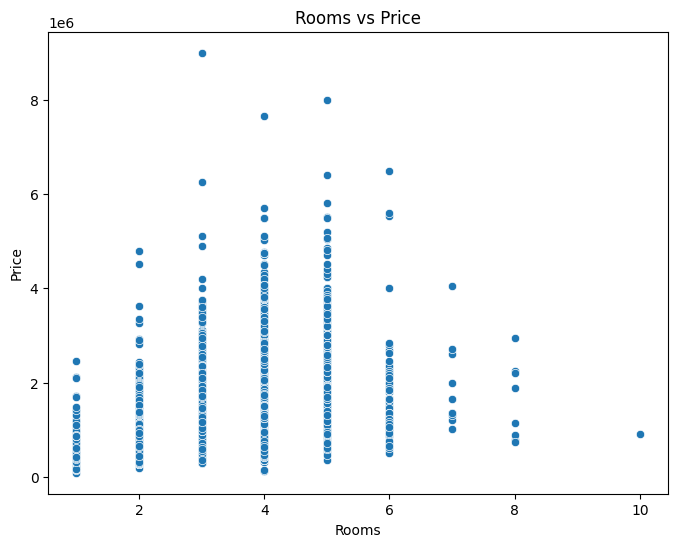

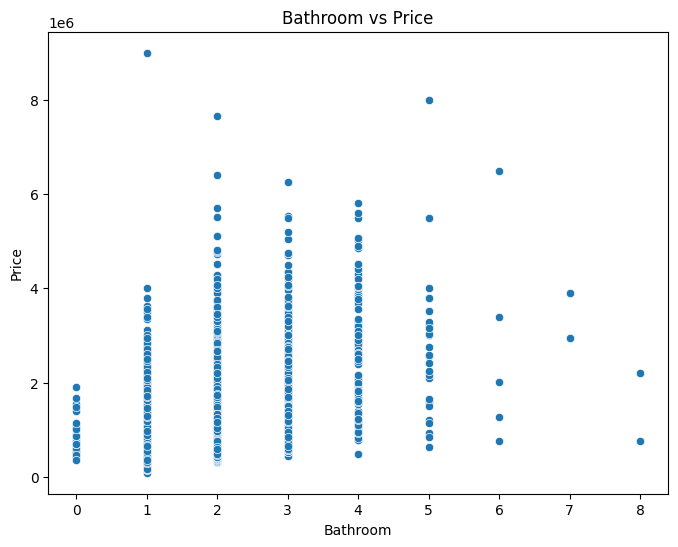

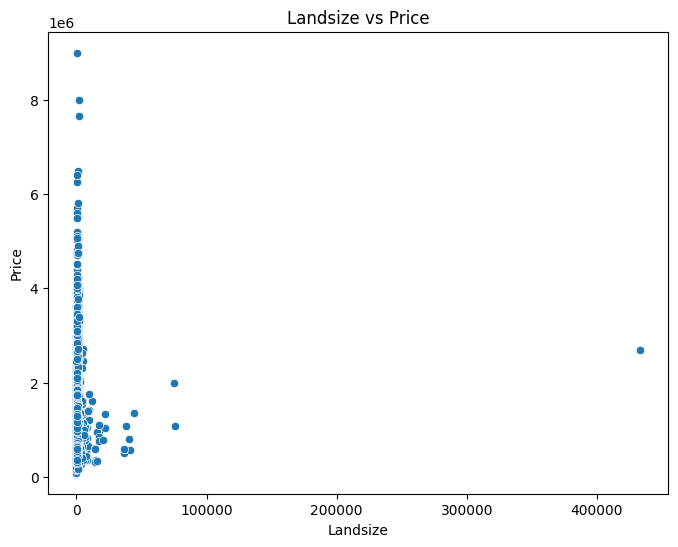

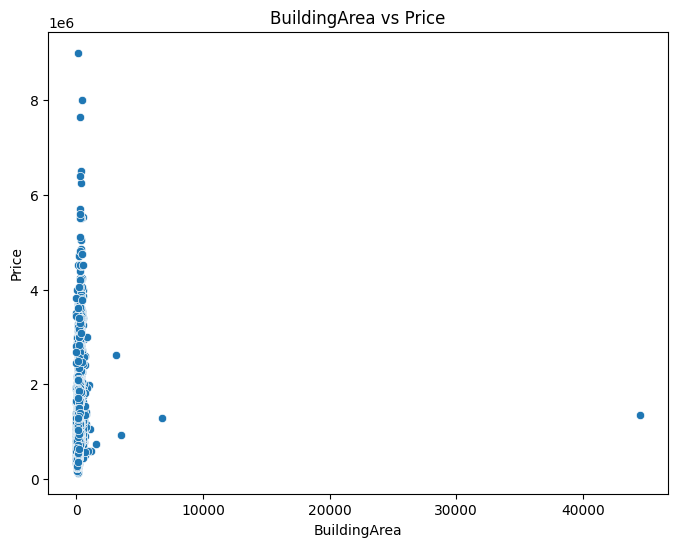

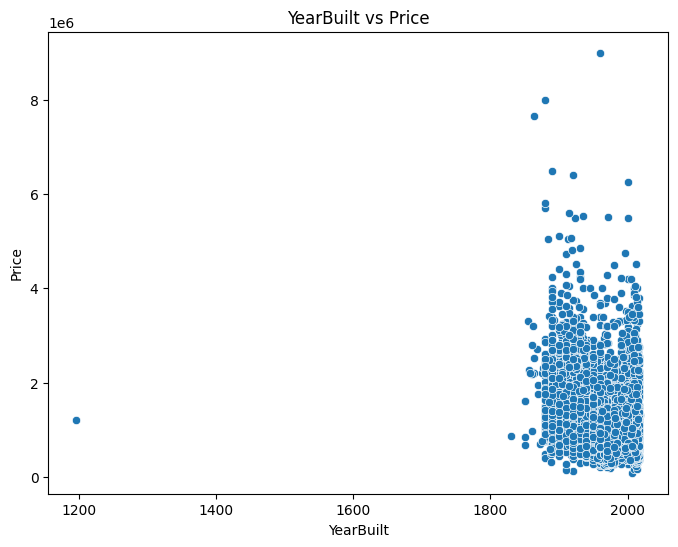

In [121]:
columnas_analisis = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']

for col in columnas_analisis:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=col, y='Price')
    plt.title(f'{col} vs Price')
    plt.show()

Se puede observar que las relaciones entre las distintas variables y el precio, no son lineales.

## Feature engineering

In [122]:
X = df_numerico.drop(columns=['Price'])
y = df_numerico['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)  # Selecciona las 5 mejores características
X_new = selector.fit_transform(X_train, y_train)

# Características seleccionadas
mask = selector.get_support()  # Array booleano de las características seleccionadas
selected_features = X.columns[mask]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom'], dtype='object')


Se realizó ingeniería de datos usando SelectKBest para seleccionar las mejores variables. Se seleccionaron las 5 mejores variables. Se eliminaron las variables que no aportaban información. La cantidad de cuartos, la distancia, el código postal, la cantidad de cuartos de dormir y la cantidad de baños son las variables más importantes.

## Modelos

### Regresiones

#### Regresión lineal

In [123]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train[selected_features], y_train)
y_pred = model_linear_regression.predict(X_test[selected_features])
r_2_linear_regression = r2_score(y_test, y_pred)
print(f"R^2 Linear Regression: {r_2_linear_regression}")

R^2 Linear Regression: 0.44141877400306706


#### Random Forest

In [125]:
model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train[selected_features], y_train)
y_pred = model_random_forest.predict(X_test[selected_features])
r_2_random_forest = r2_score(y_test, y_pred)
print(f"R^2 Random Forest: {r_2_random_forest}")

R^2 Random Forest: 0.4054766142844233


#### XGBoost

In [126]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train[selected_features], y_train)
y_pred = model_xgboost.predict(X_test[selected_features])
r_2_xgboost = r2_score(y_test, y_pred)
print(f"R^2 XGBoost: {r_2_xgboost}")

R^2 XGBoost: 0.6501660739164317


Se hicieron tres regresores, uno con regresión lineal, otro con Random Forest y otro con XGBoost. Se midió la precisión de los modelos usando R_2. El modelo que mejor se ajustó a los datos fue el random forest con un valor de 0.405. El modelo de XGBoost tuvo la peor predicción con un valor de 0.65. Los valores de la métrica son bastante bajos, por lo que parece ser que se están haciendo buenas predicciones.

### Clasificación

In [127]:
data['categoria_precio'] = pd.qcut(data['Price'], q=4, labels=['Bajo', 'Medio Bajo', 'Medio Alto', 'Alto'])


Dado que las regresiones no están dandoe resulados muy buenos optaremos por transformar el problema en un problema de clasificación. Para ello utilizariamos la variable `Price` y la transformaremos en una variable categórica. Para ello utilizaremos los cuartiles para crear 4 categorías. Y nuevamente realizaremos el proceso de selección de variables y entrenamiento de modelos.

In [128]:
df_numerico = data.select_dtypes(include=['number'])
df_numerico = df_numerico.dropna(axis=1)
df_numerico = df_numerico.drop(columns=['Longtitude', 'Lattitude'], axis=1)

X = df_numerico.drop(columns=['Price'])
y = data['categoria_precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=7)  # Selecciona las 5 mejores características
X_new = selector.fit_transform(X_train, y_train)

# Características seleccionadas
mask = selector.get_support()  # Array booleano de las características seleccionadas
selected_features = X.columns[mask]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'Propertycount'],
      dtype='object')


In [129]:
# Seleccionar características y etiquetas
X = data[selected_features]  # Características (todas menos 'precio' y 'categoria_precio')
y = data['categoria_precio']  # Etiquetas (categoría de precios)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 65.81%
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.75      0.75      0.75      1056
        Bajo       0.76      0.81      0.78      1030
  Medio Alto       0.53      0.53      0.53       986
  Medio Bajo       0.57      0.53      0.55      1002

    accuracy                           0.66      4074
   macro avg       0.65      0.66      0.65      4074
weighted avg       0.65      0.66      0.66      4074

Matriz de confusión:
[[792  10 220  34]
 [  8 835  31 156]
 [217  34 522 213]
 [ 35 225 210 532]]


En este caso vemos que el problema mejoro bastante, obteniendo un accuracy de 65.81% con el modelo de Random Forest Classifier. Lo que nos indica que abordar el problema de esta manera a traido buenos resultados. Ahora solo es necesario ver si con un modelo más complejo podemos mejorar los resultados.

In [139]:
X = data[selected_features]
y = data['categoria_precio'] 


# Encodificar las etiquetas
le = LabelEncoder()

# Ajustar y transformar los datos
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model_XGB = XGBClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model_XGB.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_XGB.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 68.75%
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1056
           1       0.78      0.81      0.80      1030
           2       0.56      0.60      0.58       986
           3       0.60      0.55      0.58      1002

    accuracy                           0.69      4074
   macro avg       0.68      0.69      0.68      4074
weighted avg       0.69      0.69      0.69      4074

Matriz de confusión:
[[819   9 212  16]
 [  9 839  25 157]
 [182  23 593 188]
 [ 24 208 220 550]]


### Hyperparameter tuning

In [142]:
# Seleccionar características y etiquetas
X = data[selected_features]  # Características (todas menos 'precio' y 'categoria_precio')
y = data['categoria_precio']  # Etiquetas (categoría de precios)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Hacer predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
Precisión del modelo: 68.29%
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.78      0.76      0.77      1056
        Bajo       0.78      0.82      0.80      1030
  Medio Alto       0.56      0.58      0.57       986
  Medio Bajo       0.60      0.55      0.57      1002

    accuracy                           0.68      4074
   macro avg       0.68      0.68      0.68      4074
weighted avg       0.68      0.68      0.68      4074

Matriz de confusión:
[[807   9 214  26]
 [  3 846  25 156]
 [191  30 575 190]
 [ 30 205 213 554]]


En conclusión se hizo un análisis exploratorio de datos, pudiendo ver ciertas tendencias en los precios y los años de venta. Se realizó también una correlación entre variables, para ver cuáles se relacionaban mejor con el precio. También se hizo feature engineering para obtener las 5 variables que mejor podrían explicar el precio. Usando estas características, realizamos modelos de regresión y de clasificación. La regresión fue bastante directa, prediciendo el valor de las casas a partir de las características. Las métricas fueron buenas para este caso. También probamos realizar una clasificación de los precios, dividiendo estos como altos, bajos, medio altos y medio bajos, basándonos en los cuartiles. Los modelos de clasificación tuvieron una precisión un poco mala. Hicimos un random forest que inicialmente dió una accuracy de 65.81%. Luego hicimos un hyperparameter tuning para mejorar el modelo y llegamos a 68.29% de accuracy. XGBoost nos dió la mejor métrica sin necesidad de hacer hyperparameter tuning, con un 68.75% de accuracy.